<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Мне понравился твой проект! Спасибо за качественную работу)
</div>

Привет, Егор!)
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Дуолан, привет. Спасибо)
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. Для нашей работы заказчиком предоставлены исторические данные: технические характеристики, комплектации и цены автомобилей. 

**Цели и задачи проекта:** 
- необходимо построить модель для определения рыночной стоимости автомобиля в новом приложении. 

**Заказчику важны:**

- качество предсказания;
- скорость предсказания;
- время обучения.

**Описание данных**

*Признаки*
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- Repaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

*Целевой признак*
- Price — цена (евро)

**План работы:**
- Изучить данные. Заполнить пропущенные значения и обработать аномалии в столбцах. Избавиться от неинформативных столбцов
- Подготовить выборки для обучения моделей.
- Обучить разные модели, одна из которых — LightGBM, а вторая без бустинга - Дерево решений.
- Проанализировать время обучения, время предсказания и качество моделей.
- Рекомендовать лучшую модель по критериям заказчика и проверить её качество на тестовой выборке.

**Примечания от заказчика:**
- Использовать метрику RMSE для оценки моделей
- Значение метрики RMSE должно быть меньше 2500

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы

И рекомендую писать введение от первого лица множественного числа. Так работа выглядит более самостоятельной)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо, согласен. Поправил
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

## Подготовка данных

### Импорт библиотек

In [105]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mode

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from catboost import CatBoostClassifier
from lightgbm import LGBMRegressor
from catboost import Pool, cv
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [96]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [2]:
try:
    df = pd.read_csv('/datasets/autos.csv')
except:
    df = pd.read_csv('/https://code.s3.yandex.net/datasets/autos.csv')

In [3]:
!pip install pandas-profiling==2.7.1

In [98]:
from tabulate import tabulate
from pandas_profiling import ProfileReport

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

### Знакомство с датасетом

In [5]:
# ProfileReport(df)

**Множество пропусков и нестыковок. Будем поэтапно проводить обработку.**

- VehicleType (пропуски значений)
- Gearbox (пропуски значений)
- Power (вбросы и нули)
- Model (пропуски значений)
- Kilometer (все ок)
- Brand (все ок)
- FuelType (пропуски значений)
- Repaired (пропуски)
- RegistrationYear (вбросы)

Столбцы, которые не нужны для обучения модели:
- DateCrawled
- DateCreated
- NumberOfPictures
- PostalCode
- LastSeen
- RegistrationMonth (от 0 до 12, получается 13 месяцев)


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍 Спасибо за информативный вывод)
</div>

### Тип данных -  даты и power

Типа столбцов с датами нужно привести вместо object к datetime. Эти столбцы не пригодятся для обучения модели, но возможно понадобятся для подготовки датасета

In [6]:
df['DateCrawled'] = pd.to_datetime(df['DateCrawled'], format='%Y.%m.%d %H:%M:%S')
df['DateCreated'] = pd.to_datetime(df['DateCreated'], format='%Y.%m.%d %H:%M:%S')
df['LastSeen'] = pd.to_datetime(df['LastSeen'], format='%Y.%m.%d %H:%M:%S')

df[['DateCrawled', 'DateCreated',
       'LastSeen']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   DateCrawled  354369 non-null  datetime64[ns]
 1   DateCreated  354369 non-null  datetime64[ns]
 2   LastSeen     354369 non-null  datetime64[ns]
dtypes: datetime64[ns](3)
memory usage: 8.1 MB


In [7]:
df['Power'] = df['Power'].astype('float')
df[['Power']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Power   354369 non-null  float64
dtypes: float64(1)
memory usage: 2.7 MB


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

### Цена

Столбец с ценой имеет слишком много нулевых значений

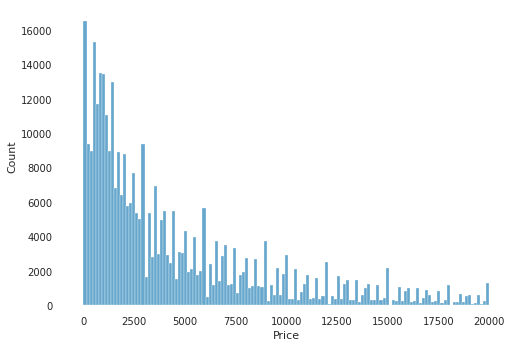

In [8]:
sns.histplot(df['Price']);

В дальнейшем все отфильтрованные значения будем помещать в новый датасет. Удалили строки, где цена меньше 100 евро. 

In [9]:
df_filtered = df.drop(df[df['Price']<100].index, axis=0)
df_filtered.shape[0]/df.shape[0]

0.9624289935067684

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

### Тип кузова

Займемся пропусками значений в столбце с типом кузова. Попытаемся заменить пропуски самым часто встречаюшимся значением кузова у бренда. В отдельной переменной сохраним таблицу с самым часто встречающимся значением (mode) типа кузова по бренду. А затем через цикл заполним пропуски в столбце с типом кузова значениями соответствующие индексу (бренд) новой переменной 

In [10]:
brand_type_pivot = df_filtered.pivot_table(index='Brand', values=['VehicleType'], aggfunc=lambda x: x.mode())
brand_type_pivot.head(15)

,VehicleType
Brand,
alfa_romeo,sedan
audi,wagon
bmw,sedan
chevrolet,small
chrysler,bus
citroen,small
dacia,wagon
daewoo,small
daihatsu,small


In [11]:
#значение nan присутствует
df_filtered['VehicleType'].unique()

array([nan, 'coupe', 'suv', 'small', 'sedan', 'convertible', 'bus',
       'wagon', 'other'], dtype=object)

In [12]:
for t in df_filtered['Brand'].unique():
    df_filtered.loc[(df_filtered['Brand'] == t) & (df_filtered['VehicleType'].isna()), 'VehicleType'] = \
    brand_type_pivot[brand_type_pivot.index == t].values[0, 0]

df_filtered['VehicleType'].unique() 

array(['sedan', 'coupe', 'suv', 'small', 'convertible', 'bus', 'wagon',
       'other'], dtype=object)

In [13]:
df_filtered['VehicleType'].isna().sum()

0

Пропуски заменены.

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

### Коробка передач

Обработаем пропуски в столбце с коробками передач

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,NaN,0.0,ka,5000,0,petrol,ford,NaN,2016-03-11,0,24148,2016-03-19 08:46:47
16,2016-04-01 12:46:46,300,sedan,2016,NaN,60.0,polo,150000,0,petrol,volkswagen,NaN,2016-04-01,0,38871,2016-04-01 12:46:46
32,2016-03-15 20:59:01,245,sedan,1994,NaN,0.0,golf,150000,2,petrol,volkswagen,no,2016-03-15,0,44145,2016-03-17 18:17:43
37,2016-03-28 17:50:15,1500,small,2016,NaN,0.0,kangoo,150000,1,gasoline,renault,no,2016-03-28,0,46483,2016-03-30 09:18:02
69,2016-04-01 11:56:40,1200,coupe,2001,NaN,0.0,astra,150000,0,NaN,opel,NaN,2016-04-01,0,47249,2016-04-07 08:46:07


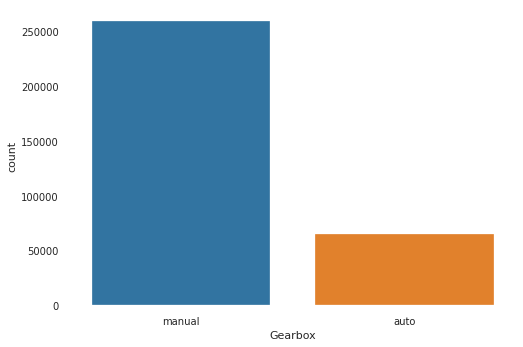

In [14]:
#вывели строки, где пропуски в Gearbox. Видим, что в основном это должны быть ручные коробки передач. 

sns.countplot(df_filtered['Gearbox']);
df_filtered[df_filtered['Gearbox'].isna()].head()

In [15]:
df_filtered['Gearbox'] = df_filtered['Gearbox'].fillna('manual')
df_filtered['Gearbox'].isna().sum()
df_filtered['Gearbox'].value_counts()

manual    276388
auto       64667
Name: Gearbox, dtype: int64

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

### Модель

In [16]:
df_filtered[df_filtered['Model'].isna()].head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190.0,NaN,125000,5,gasoline,audi,yes,2016-03-24,0,66954,2016-04-07 01:46:50
81,2016-04-03 12:56:45,350,small,1997,manual,54.0,NaN,150000,3,NaN,fiat,yes,2016-04-03,0,45665,2016-04-05 11:47:13
135,2016-03-27 20:51:23,1450,sedan,1992,manual,136.0,NaN,150000,0,NaN,audi,no,2016-03-27,0,38709,2016-04-05 20:17:31
151,2016-03-27 20:47:22,6799,small,2009,manual,60.0,NaN,20000,5,petrol,volkswagen,no,2016-03-27,0,89077,2016-03-27 20:47:22
160,2016-03-19 19:49:15,500,small,1999,manual,0.0,NaN,150000,0,petrol,renault,no,2016-03-19,0,26969,2016-04-01 11:17:48


In [17]:
model_type_pivot = df_filtered.pivot_table(index='Brand', values=['Model'], aggfunc=lambda x: x.mode())
model_type_pivot.head()

,Model
Brand,
alfa_romeo,156
audi,a4
bmw,3er
chevrolet,other
chrysler,other


In [18]:
df_filtered['Model'].value_counts() 
df_filtered['Model'].isna().sum()

17033

In [19]:
for t in df_filtered['Brand'].unique():
    df_filtered.loc[(df_filtered['Brand'] == t) & (df_filtered['Model']=='NaN'), 'Model'] = \
    model_type_pivot[model_type_pivot.index == t].values[0, 0]

df_filtered['Model'].unique() 

array(['golf', nan, 'grand', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'ka', 'polo', 'twingo', 'a_klasse',
       'scirocco', '5er', 'meriva', 'arosa', 'other', 'c4', 'civic',
       'transporter', 'punto', 'e_klasse', 'clio', 'kadett', 'kangoo',
       'one', 'fortwo', '1er', 'b_klasse', 'signum', 'astra', 'a8',
       'jetta', 'fiesta', 'c_klasse', 'micra', 'vito', 'sprinter', '156',
       'escort', 'forester', 'xc_reihe', 'scenic', 'a4', 'a1', 'insignia',
       'combo', 'focus', 'tt', 'corsa', 'a6', 'jazz', 'omega', 'slk',
       '7er', '80', '147', '100', 'z_reihe', 'sportage', 'sorento', 'v40',
       'ibiza', 'mustang', 'eos', 'touran', 'getz', 'a3', 'almera',
       'megane', 'lupo', 'r19', 'zafira', 'caddy', 'mondeo', 'cordoba',
       'colt', 'impreza', 'vectra', 'berlingo', 'tiguan', 'i_reihe',
       'espace', 'sharan', '6_reihe', 'panda', 'up', 'seicento', 'ceed',
       '5_reihe', 'yeti', 'octavia', 'mii', 'rx_reihe', '6er', 'modus',
     

In [20]:
df_filtered['Model'].isna().sum()

17033

In [21]:
df_filtered['Model'].value_counts().head()

golf     28086
other    23500
3er      19074
polo     12511
corsa    12039
Name: Model, dtype: int64

К сожалению, не все значения удалось заменить. Присвоим оставшимся пропускам второе распространенное значение other

In [22]:
df_filtered['Model'] = df_filtered['Model'].fillna('other')
df_filtered['Model'].isna().sum()

0

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

### Мощность

Обработаем нулевые значения и вбросы похожим способом: сделаем сводную таблицу с медианой по значению столбца Модели и заменим через циклы вбросы нулевые и слишком большие цифры

In [23]:
df_filtered.sort_values(by='Power', ascending=False).head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
219584,2016-03-09 15:43:53,4300,coupe,1999,auto,20000.0,clk,150000,1,petrol,mercedes_benz,no,2016-03-09,0,19406,2016-03-30 08:47:08
299180,2016-03-09 08:53:11,1500,wagon,1997,manual,19312.0,5er,150000,1,NaN,bmw,no,2016-03-09,0,21129,2016-04-07 11:44:34
114106,2016-04-03 07:36:21,9999,sedan,2006,manual,19211.0,1er,125000,0,gasoline,bmw,NaN,2016-04-03,0,45964,2016-04-07 10:16:10
132485,2016-03-25 14:55:49,2100,wagon,2001,manual,19208.0,5er,150000,5,NaN,bmw,yes,2016-03-25,0,59556,2016-03-30 05:16:18
63986,2016-03-28 11:49:56,3250,sedan,2001,auto,17932.0,omega,150000,6,petrol,opel,NaN,2016-03-28,0,86641,2016-04-06 14:17:21


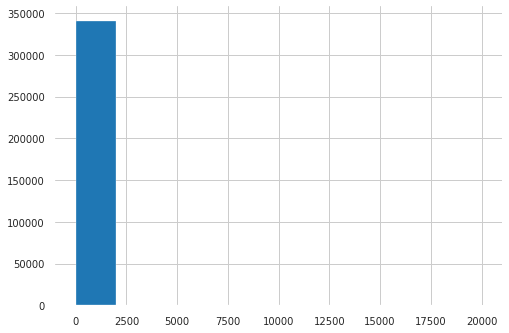

In [24]:
df_filtered['Power'].hist();

In [25]:
power_type_pivot = df_filtered.pivot_table(index='Model', values='Power', aggfunc=lambda x: x.median())
power_type_pivot.sort_values(by='Power',ascending=False).head()
power_type_pivot.sort_values(by='Power',ascending=True).head()
#power_type_pivot.describe()

,Power
Model,
samara,0.0
serie_1,0.0
601,26.0
kaefer,34.0
move,42.0


In [26]:
df_filtered['Power'].sort_values(ascending=True)

0             0.0
85120         0.0
28694         0.0
85112         0.0
241669        0.0
           ...   
63986     17932.0
132485    19208.0
114106    19211.0
299180    19312.0
219584    20000.0
Name: Power, Length: 341055, dtype: float64

In [27]:
#35 тыс нулевых значений, которые нет смысла просто удалять
df_filtered[df_filtered['Power']==0]['Power'].count()

35062

In [28]:
df_filtered[df_filtered['Power']>340]['Power'].count()

1464

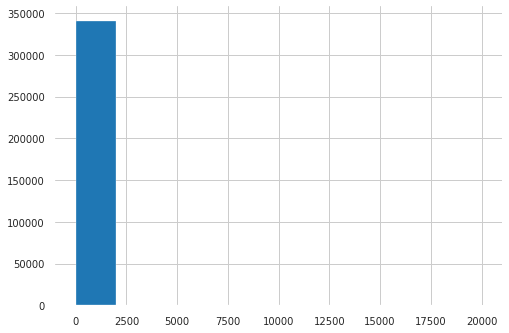

In [29]:
for t in df_filtered['Model'].unique():
    df_filtered.loc[(df_filtered['Model'] == t)&(df_filtered['Power']< 26), 'Power'] = \
    power_type_pivot[power_type_pivot.index == t].values[0, 0]

df_filtered['Power'].hist();

In [30]:
#почему-то осталось все равно 7 значений нулевых - удалим эти строки
df_filtered[df_filtered['Power']==0]['Power'].count()

7

In [31]:
df_filtered['Power'].head()

0     98.0
1    190.0
2    163.0
3     75.0
4     69.0
Name: Power, dtype: float64

In [32]:
df_filtered['Power'].shape

(341055,)

In [33]:
df_filtered = df_filtered.query('Power != 0')
df_filtered['Power'].shape

(341048,)

In [34]:
df_filtered[df_filtered['Power']==0]['Power'].count()

0

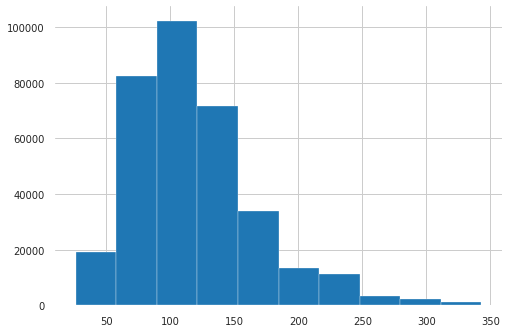

In [35]:
#обработаем через такой же цикл значения-вбросы - выше 340л.с.
for t in df_filtered['Model'].unique():
    df_filtered.loc[(df_filtered['Model'] == t)&(df_filtered['Power'] > 340), 'Power'] = \
    power_type_pivot[power_type_pivot.index == t].values[0, 0]

df_filtered['Power'].hist();

In [36]:
df_filtered[df_filtered['Power']>340]['Power'].count()

88

In [37]:
#те сбросы, которые не получилось заменить через цикл, удалим

df_filtered = df_filtered.query('Power < 340')
df_filtered[df_filtered['Power']>340]['Power'].count()

0

In [38]:
df_filtered.sort_values(by='Power',ascending=True).head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
20067,2016-03-22 08:52:13,600,sedan,1988,manual,26.0,601,5000,0,NaN,trabant,NaN,2016-03-22,0,1558,2016-03-25 00:45:57
118657,2016-03-28 09:32:12,3333,sedan,1970,manual,26.0,601,50000,6,other,trabant,no,2016-03-28,0,35644,2016-04-06 05:17:18
307370,2016-03-20 20:50:56,990,sedan,1987,manual,26.0,601,10000,12,petrol,trabant,no,2016-03-20,0,27404,2016-03-22 00:45:03


In [39]:
df_filtered.sort_values(by='Power',ascending=False).head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
208196,2016-03-25 18:54:52,10800,coupe,2007,manual,339.0,astra,150000,2,petrol,opel,no,2016-03-25,0,47506,2016-04-07 01:17:59
93609,2016-03-19 13:52:05,12999,coupe,2002,manual,338.0,3er,150000,8,petrol,bmw,no,2016-03-19,0,74572,2016-03-19 13:52:05
279609,2016-03-16 12:56:37,12999,coupe,2002,manual,338.0,3er,150000,8,petrol,bmw,no,2016-03-16,0,74572,2016-03-16 13:42:15


In [40]:
df_filtered['Power'].sort_values(ascending=True)


20067      26.0
118657     26.0
307370     26.0
14823      26.0
107757     26.0
          ...  
162628    338.0
237896    338.0
279609    338.0
93609     338.0
208196    339.0
Name: Power, Length: 340688, dtype: float64

36526 строчек не подходили из-за вбросов и нулевых значений. Из них мы удалили только лишь 95, а остальные вбросы заменили медианой по модели

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

### Тип топлива

Пропуски попробуем заменить через способ, который мы применяли в предыдущих столбцах - по моде (самое часто встречающее значение по значению другого столбца). Еще могу ошибаться, но gasoline и petrol означают одно и то же, но с разным переводом. Только если все-таки есть разница и может быть важна для модели она из-за региона производителя марки.

In [41]:
df_filtered['FuelType'].value_counts(ascending=True), df_filtered[['FuelType']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340688 entries, 0 to 354368
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   FuelType  312359 non-null  object
dtypes: object(1)
memory usage: 5.2+ MB


(electric        87
 other          153
 hybrid         226
 cng            549
 lpg           5121
 gasoline     96932
 petrol      209291
 Name: FuelType, dtype: int64,
 None)

In [42]:
df_filtered['FuelType'].isna().sum()

28329

In [43]:
df_filtered['FuelType'].unique()

array(['petrol', 'gasoline', nan, 'lpg', 'other', 'hybrid', 'cng',
       'electric'], dtype=object)

Выведем строки, где есть пропуски, и потом возьмем одну из моделей, где есть заполнение для проверки. 

In [44]:
df_filtered[df_filtered['FuelType'].isna()].head(3)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
9,2016-03-17 10:53:50,999,small,1998,manual,101.0,golf,150000,0,NaN,volkswagen,NaN,2016-03-17,0,27472,2016-03-31 17:17:06
13,2016-03-21 21:37:40,2500,wagon,2004,manual,131.0,passat,150000,2,NaN,volkswagen,no,2016-03-21,0,90762,2016-03-23 02:50:54
26,2016-03-10 19:38:18,5555,small,2017,manual,125.0,c4,125000,4,NaN,citroen,no,2016-03-10,0,31139,2016-03-16 09:16:46


In [45]:
df_filtered[(df_filtered['Model']=='c4')&(df_filtered['FuelType'].notna())].head(1)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
307,2016-03-31 14:39:03,2300,coupe,2006,manual,88.0,c4,150000,6,petrol,citroen,no,2016-03-31,0,49565,2016-04-05 18:46:30


Делаем заполнение по моде

In [46]:
fuel_type_pivot = df_filtered.pivot_table(index='Brand', values='FuelType', aggfunc=lambda x: x.mode())
fuel_type_pivot.head()

,FuelType
Brand,
alfa_romeo,petrol
audi,petrol
bmw,petrol
chevrolet,petrol
chrysler,petrol


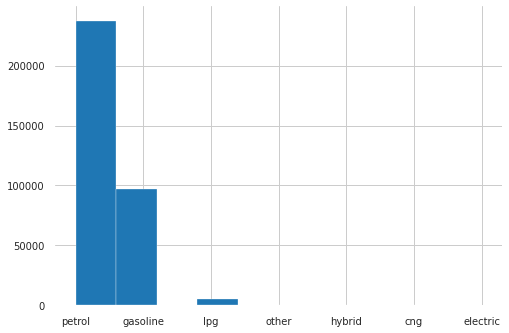

In [47]:
for t in df_filtered['Brand'].unique():
    df_filtered.loc[(df_filtered['Brand'] == t)&(df_filtered['FuelType'].isna()), 'FuelType'] = \
    fuel_type_pivot[fuel_type_pivot.index == t].values[0, 0]

df_filtered['FuelType'].hist();

In [48]:
df_filtered['FuelType'].unique(), df_filtered['FuelType'].isna().sum() 


(array(['petrol', 'gasoline', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
       dtype=object),
 0)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

### Ремонт

In [49]:
df_filtered['Repaired'].unique(), df_filtered['Repaired'].isna().sum() 

(array([nan, 'yes', 'no'], dtype=object), 64309)

In [50]:
df_filtered['Repaired'] = df_filtered['Repaired'].fillna('no')

In [51]:
df_filtered['Repaired'].unique(), df_filtered['Repaired'].isna().sum() 

(array(['no', 'yes'], dtype=object), 0)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

### Год регистрации

При знакомстве с данными видели вбросы и годы от 1000 до 9999

In [52]:
df_filtered['RegistrationYear'].sort_values()

66198     1000
71459     1000
189722    1000
213499    1000
79120     1000
          ... 
200525    9999
28965     9999
217111    9999
17271     9999
128677    9999
Name: RegistrationYear, Length: 340688, dtype: int64

In [53]:
df_filtered['DateCreated'].sort_values(ascending=False).head(1)

316279   2016-04-07
Name: DateCreated, dtype: datetime64[ns]

Последняя анкета значится 2016 годом, значит машин моложе не должно быть

In [54]:

df_filtered[df_filtered['RegistrationYear']<1950]['RegistrationYear'].count()

145

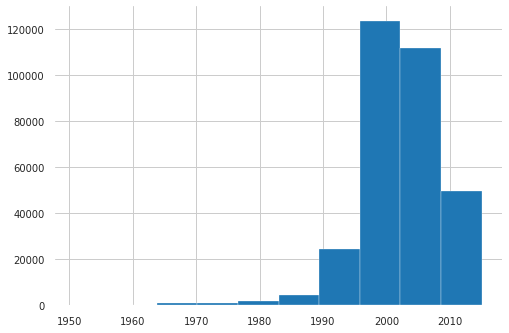

In [55]:
reg_filtered = df_filtered.query('1950 < RegistrationYear < 2016')
reg_filtered['RegistrationYear'].hist();

In [56]:
df_filtered[df_filtered['RegistrationYear']>2016]['RegistrationYear'].count()

13682

In [57]:
df_filtered.shape

(340688, 16)

Строчек после 2016 года много, но заменить их никак не удасться, придется удалить.

In [58]:
df_filtered = df_filtered.query('1950 < RegistrationYear < 2017')
df_filtered.shape

(326847, 16)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для верхней границы используешь дату скачивания анкеты 👍
</div>

### Лишние столбцы

Неинформативные столбцы уберем, обновим датафрейм, указав только нужны столбцы

In [59]:
df_filtered.columns

Index(['DateCrawled', 'Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand',
       'Repaired', 'DateCreated', 'NumberOfPictures', 'PostalCode',
       'LastSeen'],
      dtype='object')

In [60]:
df_filtered = df_filtered[['Price', 'VehicleType', 'RegistrationYear', 'Gearbox',
       'Power', 'Model', 'Kilometer', 'FuelType', 'Brand',
       'Repaired']]
df_filtered.columns, df_filtered.shape

(Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
        'Kilometer', 'FuelType', 'Brand', 'Repaired'],
       dtype='object'),
 (326847, 10))

In [61]:
print('Было мегабайт:',(df.memory_usage(index=True).sum()/1000000).round(), '|',
      'Стало мегабайт:',
     (df_filtered.memory_usage(index=True).sum()/1000000).round())

Было мегабайт: 45.0 | Стало мегабайт: 29.0


**Вывод по 1 этапу**

Познакомились с данными. Было много пропусков, нулевых значений и вбросов. Там, где прослеживалась логика для замены - заменили значения. В основном с помощью mode или median по значениям на основе заполненных других столбцов. 

Неинформативные столбцы не будем использовать в дальнейшем. В итоге сократился датасет и имеем данные без аномалий для дальнейшей работы

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

## Обучение моделей

Модели, с которыми будем работать:

- DecisionTreeRegressor
- LGBMRegressor (бустинг)

Необходимо обучить и попробовать разные гиперпараметры

### DecisionTreeRegressor

In [62]:
#функция расчета rmse
def rmse(test,predict):
    return ((mean_squared_error(test,predict))**0.5).round(2)

In [63]:
custom_score = make_scorer(rmse, greater_is_better=True)

In [64]:
# df_ohe = pd.get_dummies(df_filtered, drop_first=True)
# df_ohe.head()
# df_ohe.info()

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Для линейных моделей прямое кодирование отлично подойдет 👍
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Кодировать данные стоит после разбиения. Так у нас не будет утечки данных.

Подробнее об этом можно прочитать здесь https://datascience.stackexchange.com/questions/108663/why-label-encoding-before-split-is-data-leakage
  
Суть в том, что в предобработке данных мы не должны заглядывать в тестовую выборку. Когда кодировщик fit-ится на всей выборке, там ведь есть и тестовая выборка, поэтому это называют утечкой или подглядыванием. 

P.S. после прямого кодирования кол-во столбцов в выборках может отличаться. Тогда лишние признаки можно удалить
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Понял, спасибо. Убираю. Но ниже комментарий про то что надо использовать порядковое кодирование для дерева решений. Тогда я просто получается принимаю к сведению что прямое надо делать после разбивки и работаю с порядковым? 
    
    Но сделал бы так: после ячейки с разделением выборки:
    features_train = pd.get_dummies(features_train, drop_first=True)
    features_test = pd.get_dummies(features_test, drop_first=True)

    features_train.shape, features_test.shape, target_train.shape, target_test.shape
    #приравняем количество столбцов в выборках

    features_train = features_train[features_test.columns]
    features_train.shape, features_test.shape, target_train.shape, target_test.shape
    
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Вот порядковое кодирование ниже
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>

Оба кодирования стоит сделать после разбиения
    
- features_train_ohe, features_test_ohe  - для линейных моделей
- features_train_oe, features_test_oe - для моделей, основанных на деревьях решений
</div>

In [65]:
np.random.seed(12345)

In [66]:
features = df_filtered.drop('Price', axis=1)
target = df_filtered['Price']

# вот добавляю порядковое кодирование
enc = OrdinalEncoder()
features[['VehicleType', 'Gearbox','Model', 'FuelType', 'Brand','Repaired']] = enc.fit_transform(features[['VehicleType', 'Gearbox','Model', 'FuelType', 'Brand','Repaired']])

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25)

features_train.shape, features_test.shape, target_train.shape, target_test.shape

((245135, 9), (81712, 9), (245135,), (81712,))

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

In [70]:
model_DTR = make_pipeline(DecisionTreeRegressor())
#model_DTR = make_pipeline(StandardScaler(),DecisionTreeRegressor())
#model_RFR = make_pipeline(RandomForestRegressor())

In [71]:
params_DT= {"decisiontreeregressor__max_depth":range(2, 8)}
# params_RF = {"randomforestregressor__n_estimators":range(100, 150, 50),
#              "randomforestregressor__max_depth":range(2, 4)}

In [72]:
grid_DT = GridSearchCV(model_DTR,param_grid = params_DT,scoring=custom_score)
#grid_RF = GridSearchCV(model_RFR,param_grid = params_RF,scoring=custom_score)

In [73]:
%%time
grid_DT.fit(features_train,target_train)

CPU times: user 5.62 s, sys: 8.38 ms, total: 5.63 s
Wall time: 5.64 s


GridSearchCV(estimator=Pipeline(steps=[('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': range(2, 8)},
             scoring=make_scorer(rmse))

In [74]:
print(grid_DT.best_estimator_)
print(grid_DT.best_score_)

Pipeline(steps=[('decisiontreeregressor', DecisionTreeRegressor(max_depth=2))])
3189.892


In [75]:
%%time
grid_DT.predict(features_train)

CPU times: user 9.95 ms, sys: 3.9 ms, total: 13.9 ms
Wall time: 16.4 ms


array([10863.05426413,  2131.5698508 , 10863.05426413, ...,
        6007.49301397,  6007.49301397,  2131.5698508 ])

In [76]:
#%%time

#grid_RF.fit(features_train,target_train)

In [77]:
# print(grid_RF.best_estimator_)
# print(grid_RF.best_score_)

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Для моделей, основанных на деревьях решений, лучше использовать порядковое кодирование (OrdinalEncoder). Это должно ускорить их работу. Так как при большом количестве признаков, модель будет долго искать оптимальный сплит.

В этой кодировке важно преобразовать только категориальные признаки. Если этого не сделать, то целевая переменная тоже закодируется и метрики будут неадекватными.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Убрал прямое, поставил порядковое.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

CatBoost - хотел попробовать. но ядро юпитера падает, даже удаляя переменные - не помогает. 

In [78]:
# del df_ohe
# del features, target, features_train, features_test, target_train, target_test

In [79]:
# df_CAT = df_filtered.copy()
# df_CAT.info()

In [80]:
# features_CAT = df_CAT.drop('Price', axis=1)
# target_CAT = df_CAT['Price']

# features_CAT_train, features_CAT_test, target_CAT_train, target_CAT_test = train_test_split(
#     features_CAT, target_CAT, test_size=0.25)

In [81]:
# model_CAT = CatBoostClassifier(iterations=30, depth=3)

In [82]:
# cat_features = ['VehicleType', 'Gearbox','Model', 'FuelType', 'Brand','Repaired']

In [83]:
# %%time
# model_CAT.fit(features_CAT_train, target_CAT_train, cat_features=cat_features, verbose=10)

In [84]:
# grid = {'learning_rate': [0.03, 0.1],
#         'depth': [4, 6, 10],
#         'l2_leaf_reg': [1, 3, 5, 7, 9]}

# grid_search_result = model_CAT.grid_search(grid, 
#                                        X=features_CAT_train, 
#                                        y=target_CAT_train, 
#                                        plot=True)


In [85]:
#model_CAT.predict(features_valid)

### LGBMRegressor

In [86]:
df_LGBM = df_filtered.copy()

In [87]:
# df_LGBM = pd.get_dummies(df_LGBM_not_ohe, drop_first=True)

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

У бустингов под капотом есть возможность кодировать категориальные признаки:
 
1. CatBoost. Нужно категориальные признаки передать в параметр `cat_features`.
2. LightGBM. Нужно изменить тип данных категориальных признаков с `object` на `category`.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо. Про CatBoost знал. А вот у LGBM не нашел, где под капотом можно установить. но попробую порядкое кодирование здесь тоже
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [88]:
features_LGBM = df_LGBM.drop('Price', axis=1)
target_LGBM = df_LGBM['Price']

enc = OrdinalEncoder()
features_LGBM[['VehicleType', 'Gearbox','Model', 'FuelType', 'Brand','Repaired']] = enc.fit_transform(features_LGBM[['VehicleType', 'Gearbox','Model', 'FuelType', 'Brand','Repaired']])

features_LGBM_train, features_LGBM_test, target_LGBM_train, target_LGBM_test = train_test_split(
    features_LGBM, target_LGBM, test_size=0.25)

In [89]:
%%time
model_LGBM_rmse = LGBMRegressor(objective="regression", n_estimators=20)
model_LGBM_rmse.fit(features_LGBM_train, target_LGBM_train, eval_set=[(features_LGBM_test, target_LGBM_test),], eval_metric="rmse")



[1]	valid_0's rmse: 4187.41	valid_0's l2: 1.75344e+07
[2]	valid_0's rmse: 3909.4	valid_0's l2: 1.52834e+07
[3]	valid_0's rmse: 3665.69	valid_0's l2: 1.34373e+07
[4]	valid_0's rmse: 3451.49	valid_0's l2: 1.19128e+07
[5]	valid_0's rmse: 3264.52	valid_0's l2: 1.06571e+07
[6]	valid_0's rmse: 3098.52	valid_0's l2: 9.60085e+06
[7]	valid_0's rmse: 2955.94	valid_0's l2: 8.73761e+06
[8]	valid_0's rmse: 2830.2	valid_0's l2: 8.01006e+06
[9]	valid_0's rmse: 2723.9	valid_0's l2: 7.41961e+06
[10]	valid_0's rmse: 2629.41	valid_0's l2: 6.9138e+06
[11]	valid_0's rmse: 2548.49	valid_0's l2: 6.49481e+06
[12]	valid_0's rmse: 2479.3	valid_0's l2: 6.14692e+06
[13]	valid_0's rmse: 2415.09	valid_0's l2: 5.83267e+06
[14]	valid_0's rmse: 2360.63	valid_0's l2: 5.57256e+06
[15]	valid_0's rmse: 2309.27	valid_0's l2: 5.33271e+06
[16]	valid_0's rmse: 2264.56	valid_0's l2: 5.12821e+06
[17]	valid_0's rmse: 2228.12	valid_0's l2: 4.9645e+06
[18]	valid_0's rmse: 2194.1	valid_0's l2: 4.81407e+06
[19]	valid_0's rmse: 2161.

LGBMRegressor(n_estimators=20, objective='regression')

In [90]:
%%time
model_LGBM_rmse.predict(features_LGBM_train)

CPU times: user 306 ms, sys: 0 ns, total: 306 ms
Wall time: 299 ms


array([3367.27291463, 2335.753143  , 4139.60088779, ..., 1491.65573776,
       5147.39713313, 1450.36791448])

## Анализ моделей

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

В сравнении нужно смотреть отдельно на время обучения и время предсказания для каждой модели.
    
Если валидациционной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_train)
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Сделаю таблицу, в которую добавлю значения 
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

In [102]:
a = [
    ['DecisionTreeRegressor','5.64 s', '16.4 ms', 3189.892],
    ['LGBMRegressor','3.96 s', '299 ms', 2134.59]
]
head=['Обучение','Предсказание','RMSE']
print(tabulate(a, headers=head, tablefmt="grid"))

+-----------------------+------------+----------------+---------+
|                       | Обучение   | Предсказание   |    RMSE |
+=======================+============+================+=========+
| DecisionTreeRegressor | 5.64 s     | 16.4 ms        | 3189.89 |
+-----------------------+------------+----------------+---------+
| LGBMRegressor         | 3.96 s     | 299 ms         | 2134.59 |
+-----------------------+------------+----------------+---------+


LGBMRegressor обучается быстрее и дает лучше результат RMSE, чем DecisionTreeRegressor. Но предсказаывает модель с градиентным бустингом дольше.
Рузультат качества модели дерево решений: 3189.892. С этой моделью мы не можем добиться заданной планки метрики - ниже 2500.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Приятно было бы видеть результаты в информативной таблице
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Сделал)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует анализу 👍 Значит рекомендуем заказчику LGBM
</div>

# Тестирование лучшей модели

Проверим на тестовой выборке LGBMRegressor.

In [91]:
%%time

pred_LGBM = model_LGBM_rmse.predict(features_LGBM_test)

CPU times: user 112 ms, sys: 706 µs, total: 113 ms
Wall time: 186 ms


In [92]:
rmse(target_LGBM_test,pred_LGBM)

2134.59

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Отличный результат 👍 
</div>

**Общий вывод**

Больший объем работы над проектом пришлось на предобработку данных. Множество пропусков и вбросов в данных датасета обрабатывали с помощью часто встречающихся значений или медианой.

Далее обучили 2 модели - с бустингом и без. Нас интересовало время на обучение и его качество. Модель с градиентным бустингом LightGBM показала себя лучше. Модель проверена на тестовой выборке - **RMSE = 2134**


# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Дуолан, спасибо большое за внимание и советы )
</div>

# <font color='orange'>2. Общее впечатление</font>
* Спасибо за быстрое внесение правок
* Теперь проект выглядит лучше )
* Критических замечаний нет
* Молодец, отличная работа!
* Надеюсь, ревью было полезным
* Удачи в дальнейшем обучении 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо большое за ссылочки. Решил попробовать визуализацию. Подскажи, пожалуйста, как адаптировать нормально?
</div>

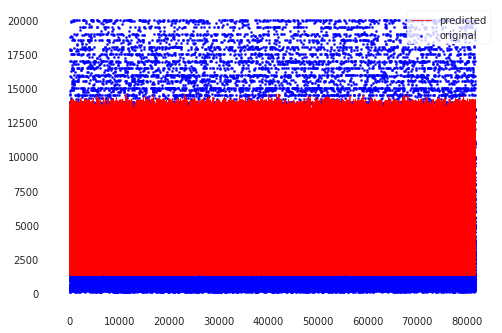

In [112]:
x_ax = range(len(features_LGBM_test))
plt.scatter(x_ax, target_LGBM_test, s=5, color="blue", label="original")
plt.plot(x_ax, pred_LGBM, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Стоит увеличить график + добавить прозрачность через alpha

А так, такие графики информативны лишь во временных рядах (следующий спринт). Там нужно построить график с предсказанными и реальными значениями (по оси x - время). А здесь непонятно что происходит)
</div>